In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading dataset
data = pd.read_csv("/content/drive/MyDrive/Loan_default.csv")
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
# Exploratory Data Analysis

In [ ]:
data.shape

(255347, 18)

In [ ]:
data.EmploymentType.unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [ ]:
data.isnull().sum()   # there is no null values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
# Creating categorical data and numerical data
categorical_df=data[['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']]
numerical_df=data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio']]
numerical_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio
0,56,85994,50587,520,80,15.23,36,0.44
1,69,50432,124440,458,15,4.81,60,0.68
2,46,84208,129188,451,26,21.17,24,0.31
3,32,31713,44799,743,0,7.07,24,0.23
4,60,20437,9139,633,8,6.51,48,0.73
...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,14.11,12,0.85
255343,32,51953,189899,511,14,11.55,24,0.21
255344,56,84820,208294,597,70,5.29,60,0.50
255345,42,85109,60575,809,40,20.90,48,0.44


In [ ]:
# Checking for data error
for variable in categorical_df:
    print(data[variable].value_counts())
    print("-"*50)

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
--------------------------------------------------
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
--------------------------------------------------
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
--------------------------------------------------
Yes    127742
No     127605
Name: HasDependents, dtype: int64
--------------------------------------------------
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64
--------------------------------------------------
2    64130
3    63834
4    63829
1    63554
Name: NumCreditLines, dtype: int64
-------------------------------------

In [ ]:
# Our dataset is in clean format there is no error.

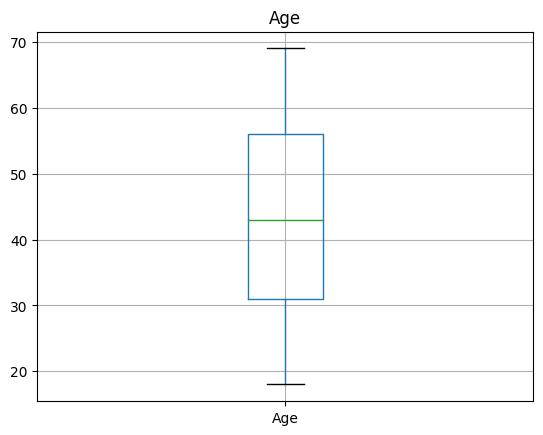

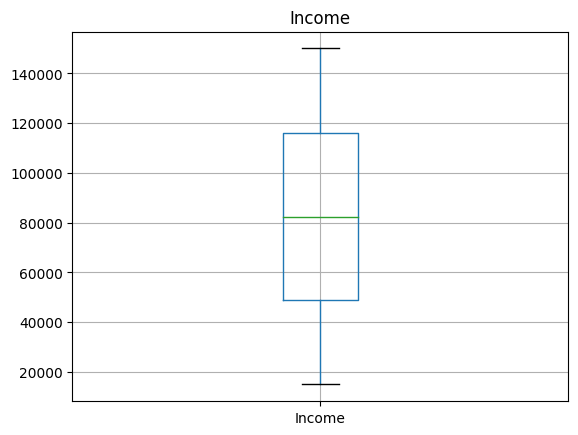

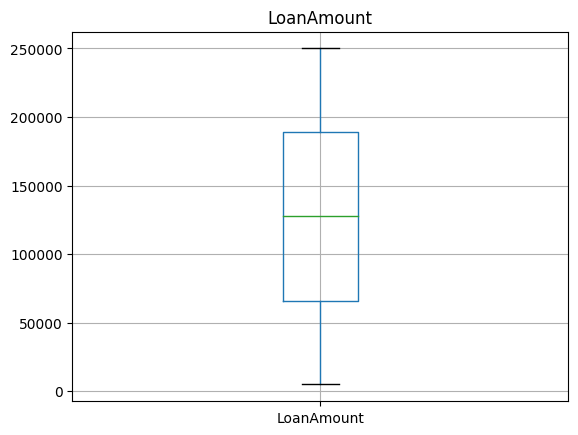

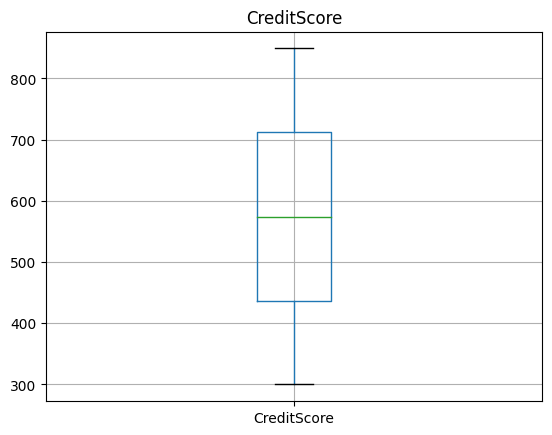

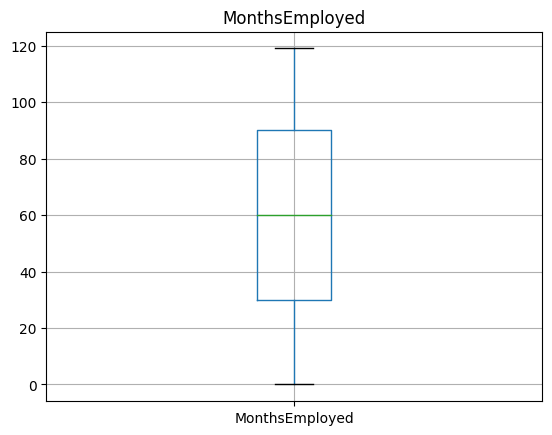

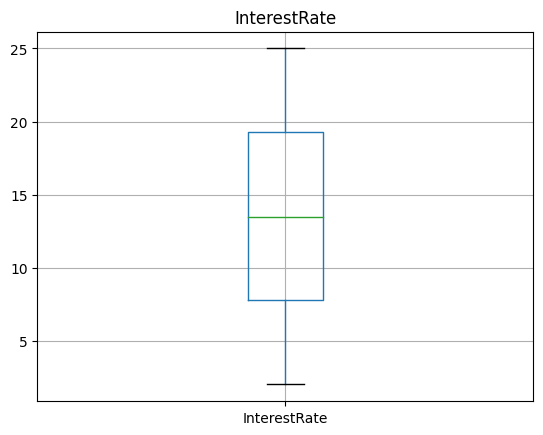

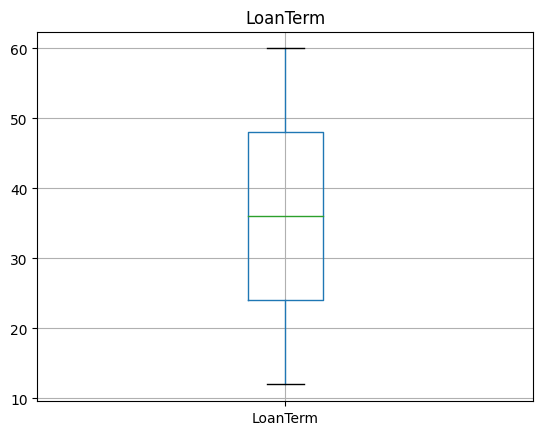

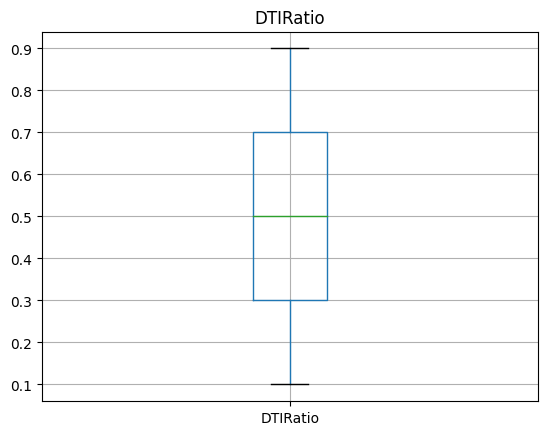

In [ ]:
# Checking for outliers
# Assuming numerical_df is your DataFrame
for column in numerical_df.columns:
    plt.figure()
    plt.title(column)
    numerical_df.boxplot(column)
    plt.show()

**Our data is outliers free.**

**Data Visualization**

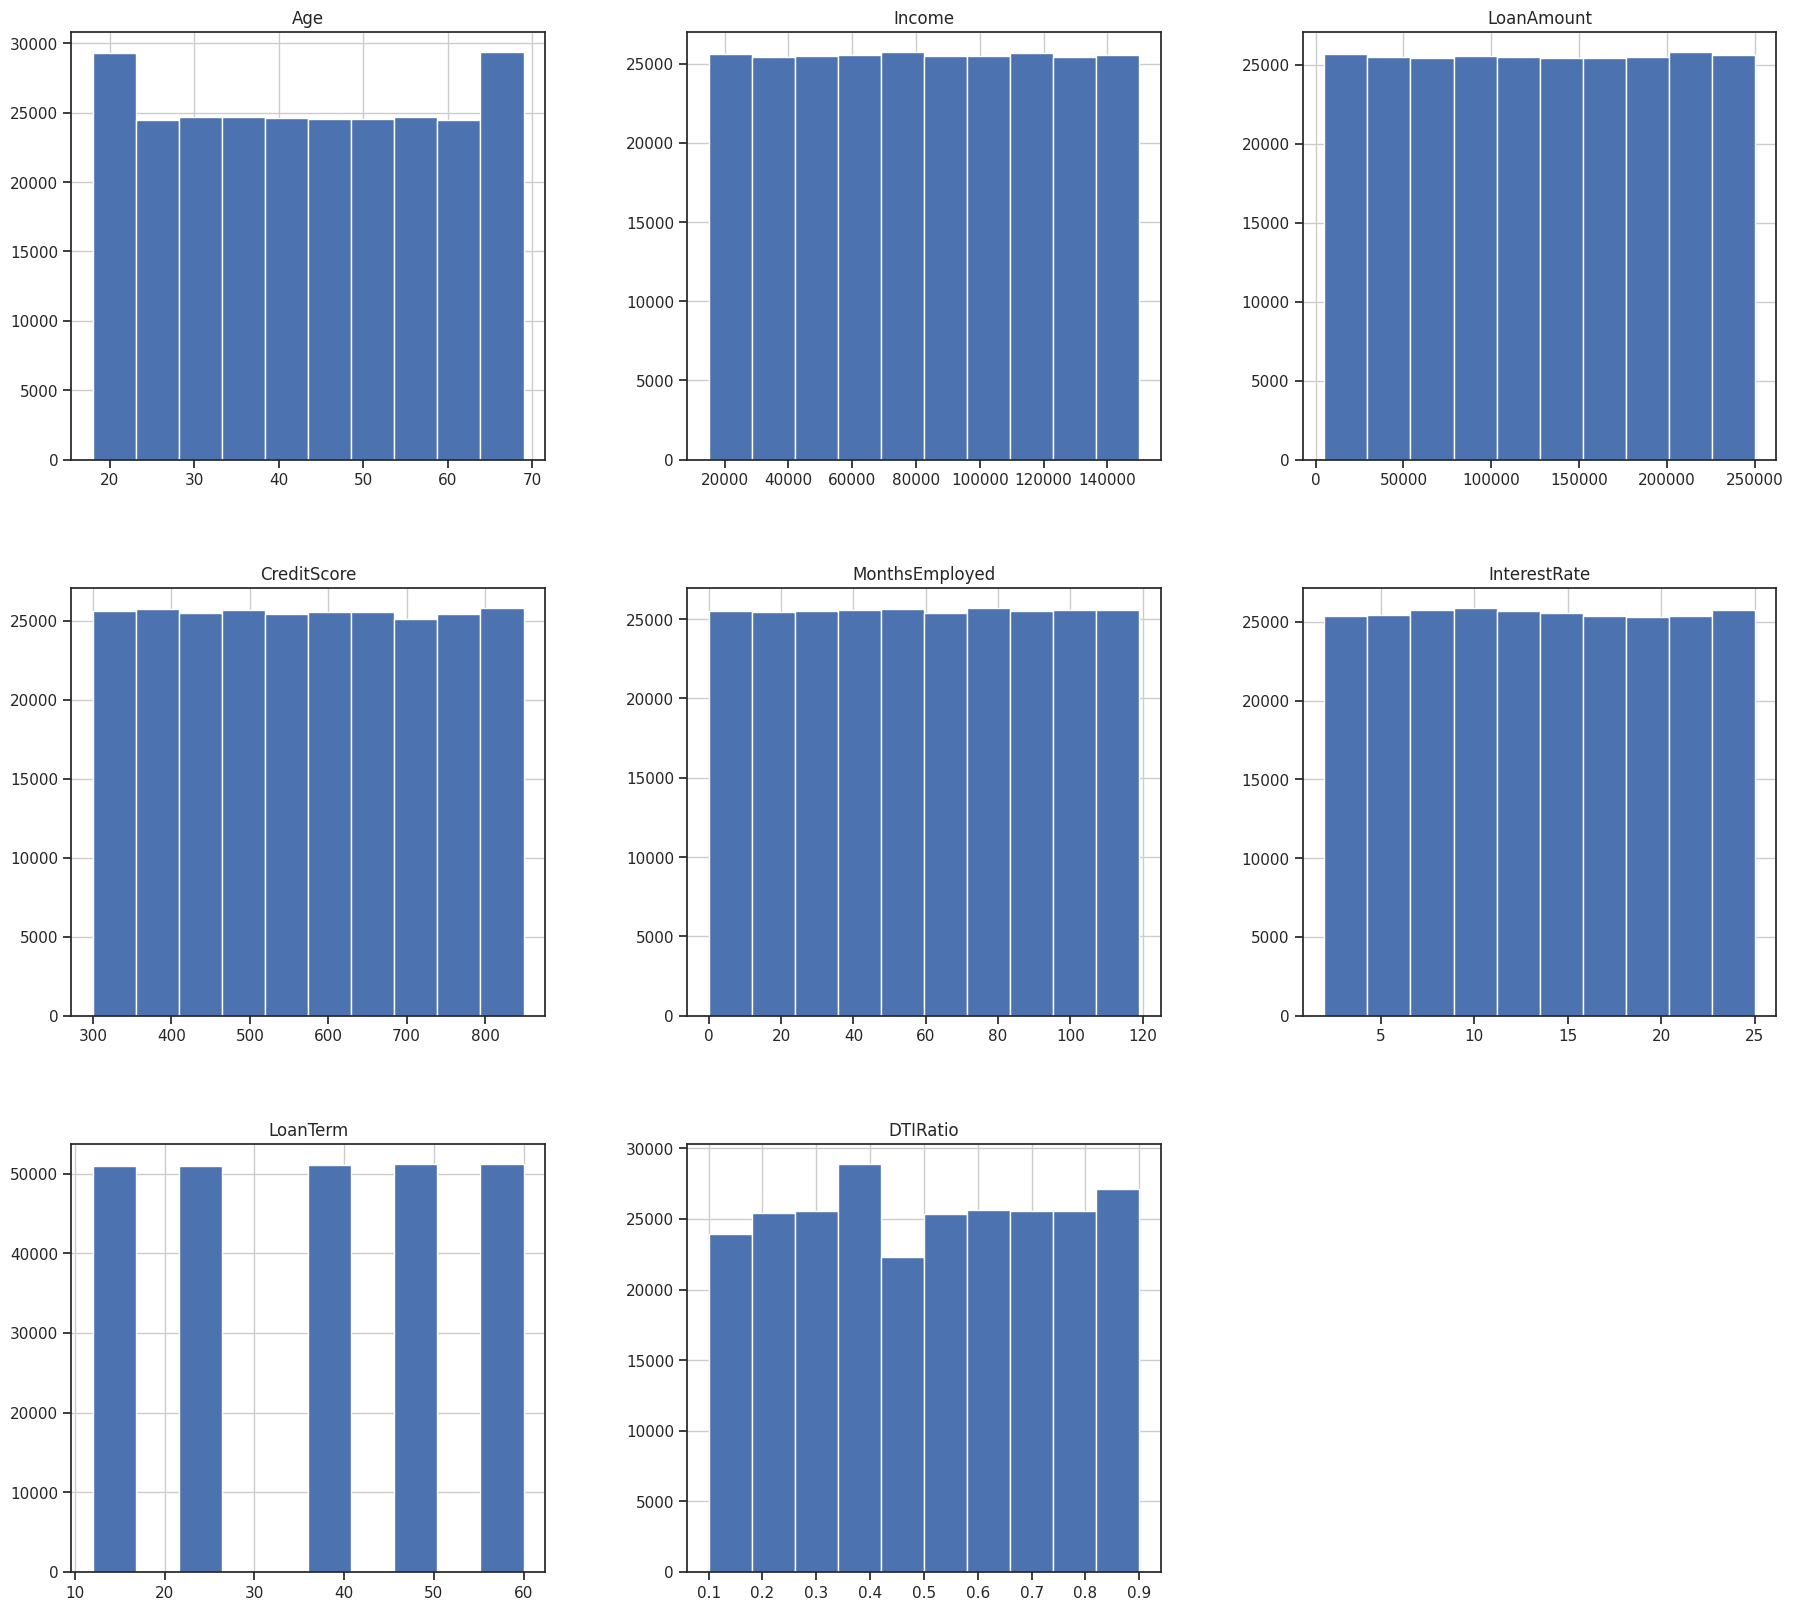

In [ ]:
numerical_df.hist( figsize = (22, 20) )
plt.show()

# histograms of the variables
#data.hist()
#pyplot.show()

<Axes: xlabel='Age', ylabel='Density'>

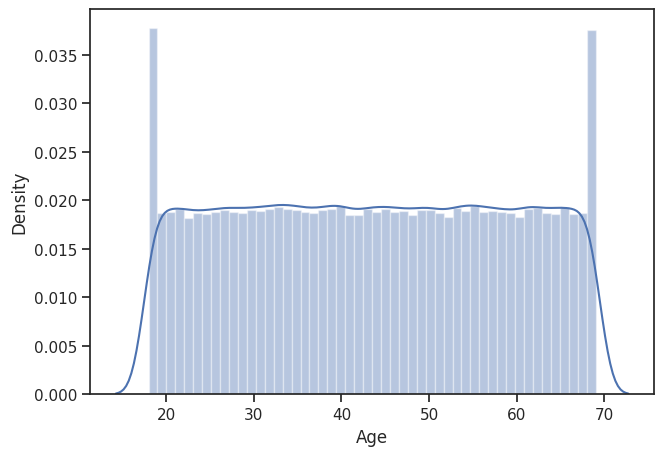

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(numerical_df['Age'])

In [ ]:
# Create a scatter plot matrix
#sns.set(style="ticks")
#sns.pairplot(numerical_df)
#plt.show()

In [ ]:
data['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

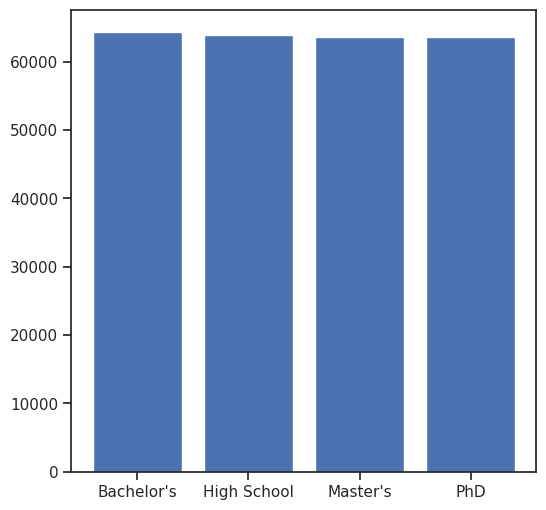

In [ ]:
fig, ax = plt.subplots( figsize = (6,6) )
#fig, ax = plt.subplots()
ax.bar(data['Education'].value_counts().index, data['Education'].value_counts().values)
plt.show()

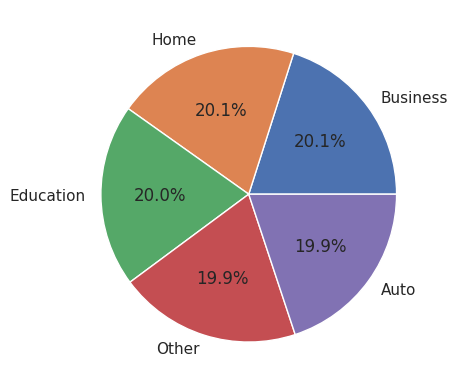

In [ ]:
x = data['LoanPurpose'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
data.head(1)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


<Axes: xlabel='Education', ylabel='count'>

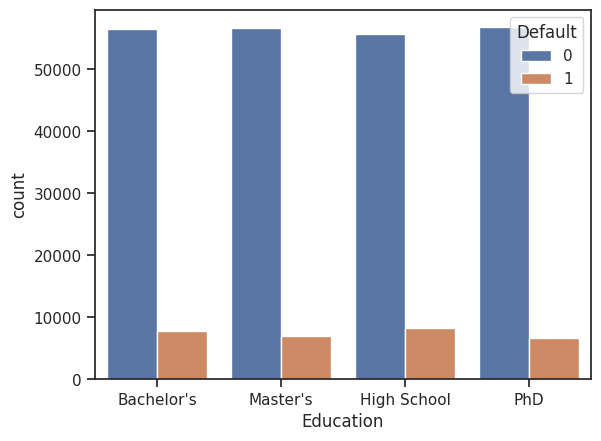

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='Education', hue='Default', ax=ax, data=data)

<Axes: xlabel='MaritalStatus', ylabel='count'>

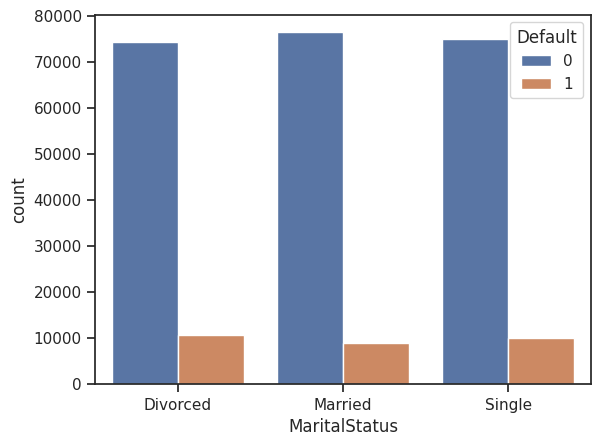

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='MaritalStatus', hue='Default', ax=ax, data=data)

In [ ]:
data.head(1)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


<Axes: xlabel='HasMortgage', ylabel='Income'>

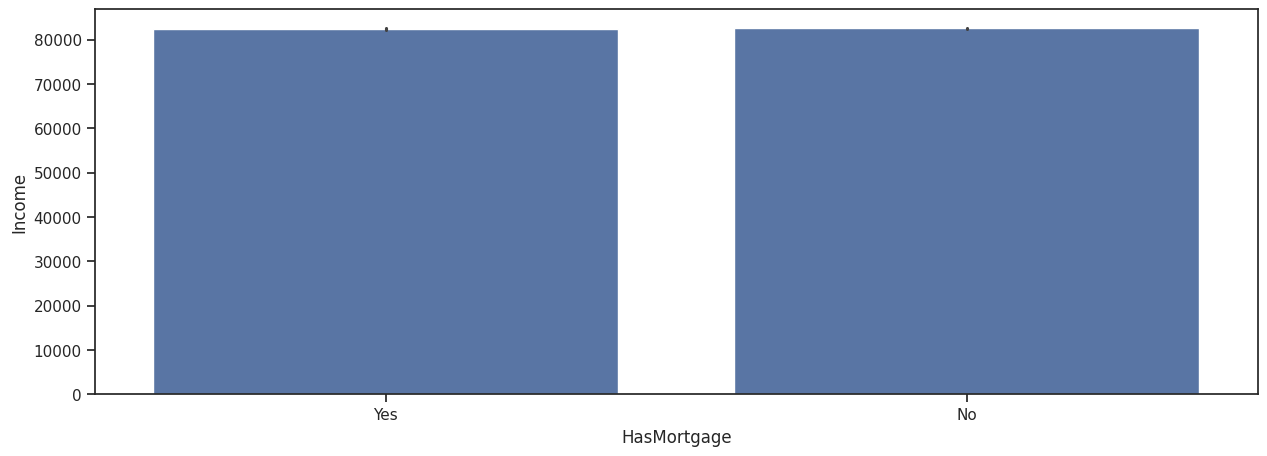

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data['HasMortgage'], y=data['Income'])

<Axes: xlabel='Age', ylabel='Density'>

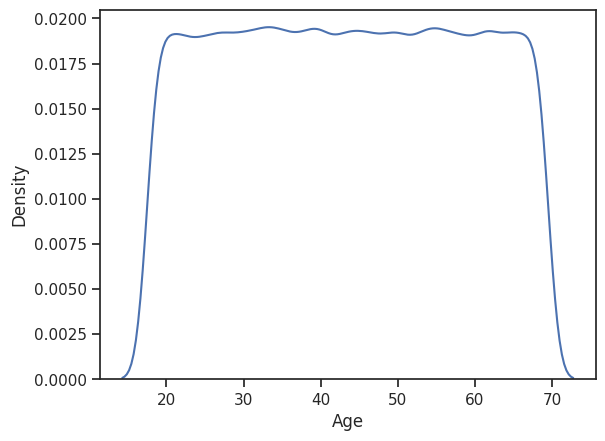

In [ ]:
sns.kdeplot(data.Age)

In [ ]:
df=data.copy()
df.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [ ]:
#df.drop("Age",axis=1,inplace=True)
#df.drop("Income",axis=1,inplace=True)
#df.drop("LoanAmount",axis=1,inplace=True)
#df.drop("CreditScore",axis=1,inplace=True)
#df.drop("MonthsEmployed",axis=1,inplace=True)
#df.drop("InterestRate",axis=1,inplace=True)
#df.drop("LoanTerm",axis=1,inplace=True)
#df.drop("DTIRatio",axis=1,inplace=True)

Normalising the Data

In [ ]:
#Normalizing the data

from sklearn import preprocessing

d = preprocessing.normalize(numerical_df)
scaled_df = pd.DataFrame(d, columns=numerical_df.columns)
print(scaled_df)

             Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0       0.000561  0.861912    0.507030     0.005212        0.000802   
1       0.000514  0.375596    0.926777     0.003411        0.000112   
2       0.000298  0.546060    0.837741     0.002925        0.000169   
3       0.000583  0.577726    0.816118     0.013535        0.000000   
4       0.002679  0.912512    0.408057     0.028263        0.000357   
...          ...       ...         ...          ...             ...   
255342  0.000089  0.177407    0.984134     0.002527        0.000509   
255343  0.000163  0.263884    0.964551     0.002596        0.000071   
255344  0.000249  0.377141    0.926152     0.002654        0.000311   
255345  0.000402  0.814691    0.579843     0.007744        0.000383   
255346  0.002133  0.771415    0.635941     0.021885        0.003888   

        InterestRate  LoanTerm  DTIRatio  
0           0.000153  0.000361  0.000004  
1           0.000036  0.000447  0.000005  
2           0.0001

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   InterestRate    255347 non-null  float64
 6   LoanTerm        255347 non-null  float64
 7   DTIRatio        255347 non-null  float64
dtypes: float64(8)
memory usage: 15.6 MB


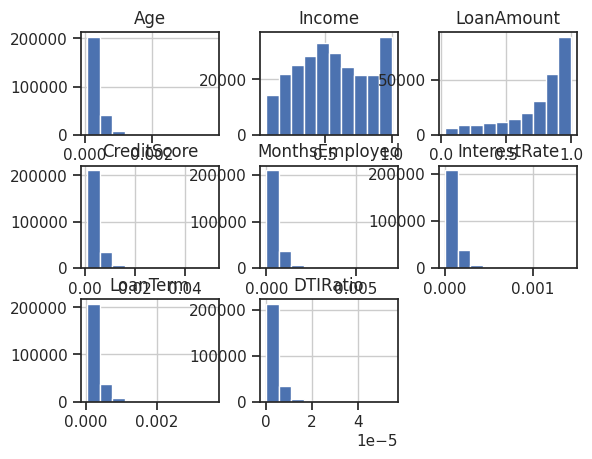

In [ ]:
#data_log.hist(figsize = (22, 20))
#plt.show()

# histograms of the variables
scaled_df.hist()
plt.show()

<Axes: ylabel='Density'>

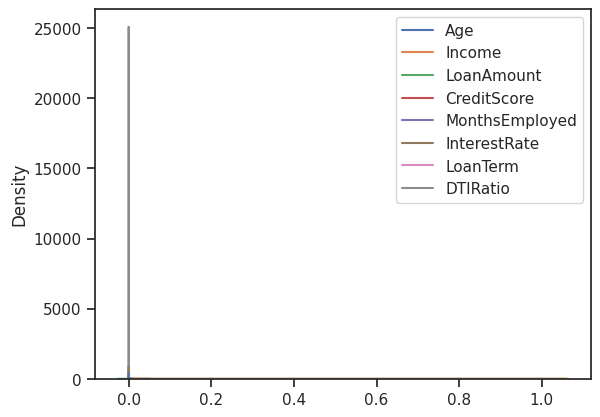

In [ ]:
sns.kdeplot(scaled_df)

In [ ]:
# Removing Skewness by using Quantile Transformer

from sklearn.preprocessing import QuantileTransformer
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(scaled_df)
data_trans=pd.DataFrame(data_trans,columns=numerical_df.columns)
data_trans
#data_trans.info()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio
0,1.188845,0.923915,-0.954290,0.673173,1.116746,0.897927,0.726145,0.589834
1,1.062991,-0.581305,0.598884,-0.078123,-1.018306,-0.969021,1.055912,0.793880
2,0.189484,0.018866,-0.009859,-0.399173,-0.751739,0.742044,-0.484780,-0.576129
3,1.236922,0.119726,-0.104307,1.951003,-5.199338,0.644928,1.025304,0.513786
4,3.190259,1.120963,-1.133581,2.841692,-0.056146,1.764402,3.155677,3.105817
...,...,...,...,...,...,...,...,...
255342,-2.142456,-1.434230,1.442366,-0.695437,0.448458,-0.317890,-1.662999,0.419111
255343,-0.904832,-0.991865,1.006212,-0.640084,-1.275257,-0.456664,-0.748778,-1.308219
255344,-0.148998,-0.574064,0.590791,-0.589291,-0.206660,-1.399238,0.273733,-0.456239
255345,0.685060,0.775679,-0.803226,1.284676,0.029560,1.286771,1.100133,0.520452


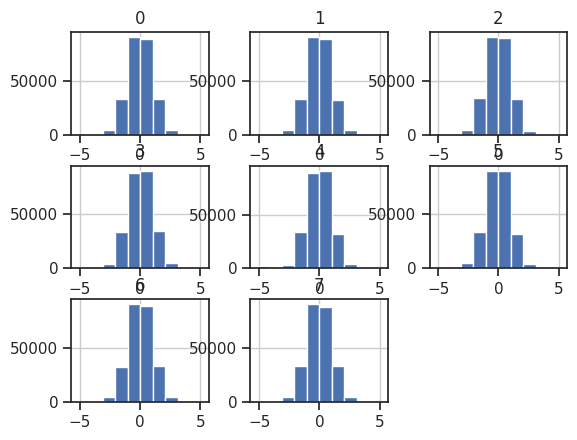

In [ ]:
# histograms of the variables
data_trans.hist()
plt.show()

<Axes: ylabel='Density'>

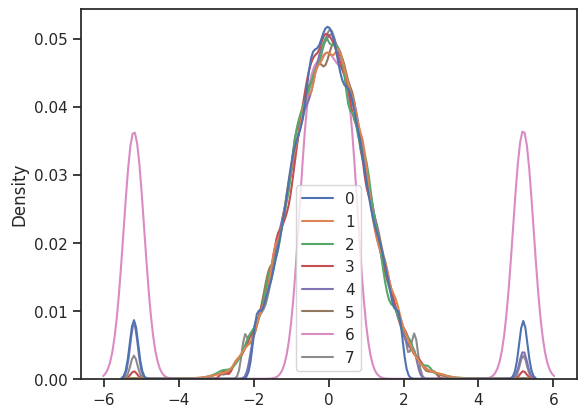

In [ ]:
sns.kdeplot(data_trans)

In [ ]:
df=data.copy()
df.drop("Age",axis=1,inplace=True)
df.drop("Income",axis=1,inplace=True)
df.drop("LoanAmount",axis=1,inplace=True)
df.drop("CreditScore",axis=1,inplace=True)
df.drop("MonthsEmployed",axis=1,inplace=True)
df.drop("InterestRate",axis=1,inplace=True)
df.drop("LoanTerm",axis=1,inplace=True)
df.drop("DTIRatio",axis=1,inplace=True)

In [ ]:
data_1=pd.concat([df,data_trans],axis=1,join='inner')
data_1

,LoanID,NumCreditLines,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio
0,I38PQUQS96,4,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,1.188845,0.923915,-0.954290,0.673173,1.116746,0.897927,0.726145,0.589834
1,HPSK72WA7R,1,Master's,Full-time,Married,No,No,Other,Yes,0,1.062991,-0.581305,0.598884,-0.078123,-1.018306,-0.969021,1.055912,0.793880
2,C1OZ6DPJ8Y,3,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,0.189484,0.018866,-0.009859,-0.399173,-0.751739,0.742044,-0.484780,-0.576129
3,V2KKSFM3UN,3,High School,Full-time,Married,No,No,Business,No,0,1.236922,0.119726,-0.104307,1.951003,-5.199338,0.644928,1.025304,0.513786
4,EY08JDHTZP,4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,3.190259,1.120963,-1.133581,2.841692,-0.056146,1.764402,3.155677,3.105817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,4,Bachelor's,Full-time,Married,No,No,Other,No,0,-2.142456,-1.434230,1.442366,-0.695437,0.448458,-0.317890,-1.662999,0.419111
255343,98R4KDHNND,2,High School,Part-time,Divorced,No,No,Home,No,1,-0.904832,-0.991865,1.006212,-0.640084,-1.275257,-0.456664,-0.748778,-1.308219
255344,XQK1UUUNGP,3,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,-0.148998,-0.574064,0.590791,-0.589291,-0.206660,-1.399238,0.273733,-0.456239
255345,JAO28CPL4H,1,High School,Part-time,Single,Yes,Yes,Other,No,0,0.685060,0.775679,-0.803226,1.284676,0.029560,1.286771,1.100133,0.520452


In [ ]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   InterestRate    255347 non-null  float64
 6   LoanTerm        255347 non-null  float64
 7   DTIRatio        255347 non-null  float64
dtypes: float64(8)
memory usage: 15.6 MB


In [ ]:
# Changing the name of normalised data
#data_1.rename(columns = {0:'Age',1:'Income',2:'LoanAmount',3:'CreditScore',4:'MonthsEmployed',5:'InterestRate',6:'LoanTerm',7:'DTIRatio'}, inplace = True)
#data_1

,LoanID,NumCreditLines,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio
0,I38PQUQS96,4,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.631785,0.084543,-0.907476,-0.254902,0.445919,0.203092,-0.007527,-0.174005
1,HPSK72WA7R,1,Master's,Full-time,Married,No,No,Other,Yes,0,5.199338,-0.645773,-0.042958,-0.555462,-1.125776,-1.180744,5.199338,0.608973
2,C1OZ6DPJ8Y,3,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,0.096753,0.048848,0.004654,-0.596935,-0.771450,0.976887,-0.529301,-0.625670
3,V2KKSFM3UN,3,High School,Full-time,Married,No,No,Business,No,0,-0.579039,-1.156703,-0.987739,0.853480,-5.199338,-0.791884,-0.529301,-0.971436
4,EY08JDHTZP,4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.888309,-1.748977,-2.161526,0.260089,-1.456896,-0.874487,0.523537,0.803958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,4,Bachelor's,Full-time,Married,No,No,Other,No,0,-1.910600,-0.965146,0.989751,-0.160010,1.358913,0.083625,-5.199338,1.554270
255343,98R4KDHNND,2,High School,Part-time,Divorced,No,No,Home,No,1,-0.579039,-0.606102,0.686261,-0.303168,-1.169401,-0.219629,-0.529301,-1.070745
255344,XQK1UUUNGP,3,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,0.631785,0.061407,0.954976,0.086674,0.229064,-1.073841,5.199338,0.016310
255345,JAO28CPL4H,1,High School,Part-time,Single,Yes,Yes,Other,No,0,-0.087933,0.065808,-0.772723,1.456896,-0.410169,0.933910,0.523537,-0.174005


**Feature Engineering**


In [ ]:
#from sklearn.preprocessing import LabelEncoder

# Import label encoder
#from sklearn import preprocessing

# label_encoder object knows
#label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
#data_1['Education']= label_encoder.fit_transform(data_1['Education'])

In [ ]:
data_1.head(2)

,LoanID,NumCreditLines,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio
0,I38PQUQS96,4,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.631785,0.084543,-0.907476,-0.254902,0.445919,0.203092,-0.007527,-0.174005
1,HPSK72WA7R,1,Master's,Full-time,Married,No,No,Other,Yes,0,5.199338,-0.645773,-0.042958,-0.555462,-1.125776,-1.180744,5.199338,0.608973


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One hot Encoding
data_1 = pd.get_dummies(data_1,columns=list(['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']),dtype=int)
data_1

,LoanID,NumCreditLines,Default,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,4,0,1.188845,0.923915,-0.954290,0.673173,1.116746,0.897927,0.726145,...,1,0,1,0,0,0,0,1,0,1
1,HPSK72WA7R,1,0,1.062991,-0.581305,0.598884,-0.078123,-1.018306,-0.969021,1.055912,...,0,1,0,0,0,0,0,1,0,1
2,C1OZ6DPJ8Y,3,1,0.189484,0.018866,-0.009859,-0.399173,-0.751739,0.742044,-0.484780,...,1,0,1,1,0,0,0,0,1,0
3,V2KKSFM3UN,3,0,1.236922,0.119726,-0.104307,1.951003,-5.199338,0.644928,1.025304,...,0,1,0,0,1,0,0,0,1,0
4,EY08JDHTZP,4,0,3.190259,1.120963,-1.133581,2.841692,-0.056146,1.764402,3.155677,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,4,0,-2.142456,-1.434230,1.442366,-0.695437,0.448458,-0.317890,-1.662999,...,0,1,0,0,0,0,0,1,1,0
255343,98R4KDHNND,2,1,-0.904832,-0.991865,1.006212,-0.640084,-1.275257,-0.456664,-0.748778,...,0,1,0,0,0,0,1,0,1,0
255344,XQK1UUUNGP,3,0,-0.148998,-0.574064,0.590791,-0.589291,-0.206660,-1.399238,0.273733,...,1,0,1,1,0,0,0,0,0,1
255345,JAO28CPL4H,1,0,0.685060,0.775679,-0.803226,1.284676,0.029560,1.286771,1.100133,...,1,0,1,0,0,0,0,1,1,0


**Feature Scaling**

In [ ]:
#data.info()
data_1.drop(columns=['LoanID'], inplace=True)

In [ ]:
from sklearn import preprocessing

# Create a MinMaxScaler object
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data_1)

# Transform the data using the scaler
normalized_data = scaler.fit_transform(data_1)
data_nor=pd.DataFrame(normalized_data,columns=data_1.columns)
data_nor

,NumCreditLines,Default,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,1.000000,0.0,0.614327,0.588849,0.408230,0.564736,0.607393,0.586350,0.569831,0.556722,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,0.0,0.602224,0.444098,0.557592,0.492487,0.402074,0.406813,0.601543,0.576344,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.666667,1.0,0.518222,0.501814,0.499052,0.461613,0.427708,0.571359,0.453381,0.444596,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.0,0.618950,0.511514,0.489969,0.687620,0.000000,0.562020,0.598599,0.549409,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.000000,0.0,0.806795,0.607799,0.390988,0.773274,0.494601,0.669676,0.803469,0.798674,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,1.000000,0.0,0.293968,0.362076,0.638707,0.433123,0.543126,0.469430,0.340076,0.540304,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
255343,0.333333,1.0,0.412986,0.404616,0.596763,0.438446,0.377364,0.456084,0.427993,0.374194,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
255344,0.666667,0.0,0.485671,0.444794,0.556814,0.443330,0.480126,0.365441,0.526324,0.456125,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
255345,0.000000,0.0,0.565880,0.574594,0.422757,0.623542,0.502843,0.623744,0.605796,0.550050,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Installing Pycaret library
#!pip install pycaret[full]
#!pip install --upgrade pandas "dask[complete]"
#!pip install --upgrade pandas
!pip install --upgrade pycaret

In [ ]:
from pycaret.classification import *

reg = setup(data=data_1,
    target='Default',
    train_size=0.8,
    session_id=123,
    normalize=True
)

,Description,Value
0,Session id,123
1,Target,Default
2,Target type,Binary
3,Original data shape,"(255347, 29)"
4,Transformed data shape,"(255347, 29)"
5,Transformed train set shape,"(204277, 29)"
6,Transformed test set shape,"(51070, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:22:08
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8839,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0730
ridge,Ridge Classifier,0.8839,0.0000,0.0004,0.7000,0.0008,0.0007,0.0148,0.5260
lr,Logistic Regression,0.8833,0.7154,0.0325,0.4643,0.0608,0.0463,0.0984,1.7470
nb,Naive Bayes,0.8831,0.6653,0.0476,0.4701,0.0864,0.0664,0.1204,0.5400
knn,K Neighbors Classifier,0.8752,0.5778,0.0442,0.2717,0.0760,0.0450,0.0674,46.4390
dt,Decision Tree Classifier,0.8024,0.5508,0.2232,0.1944,0.2078,0.0955,0.0958,3.9980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8860,0.7500,0.0481,0.6195,0.0892,0.0737,0.1497,65.4250
lightgbm,Light Gradient Boosting Machine,0.8860,0.7489,0.0642,0.5839,0.1156,0.0948,0.1660,13.4910
ada,Ada Boost Classifier,0.8856,0.7426,0.0511,0.5828,0.0939,0.0766,0.1475,13.4500
rf,Random Forest Classifier,0.8855,0.7253,0.0323,0.6357,0.0614,0.0508,0.1248,47.7150
xgboost,Extreme Gradient Boosting,0.8843,0.7336,0.0787,0.5125,0.1364,0.1089,0.1667,3.3130
svm,SVM - Linear Kernel,0.8839,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0730
ridge,Ridge Classifier,0.8839,0.0000,0.0004,0.7000,0.0008,0.0007,0.0148,0.5260
et,Extra Trees Classifier,0.8839,0.6923,0.0048,0.5151,0.0095,0.0074,0.0406,39.0630
dummy,Dummy Classifier,0.8839,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4210
lr,Logistic Regression,0.8833,0.7154,0.0325,0.4643,0.0608,0.0463,0.0984,1.7470


In [ ]:
(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Splitting the data**

In [ ]:
# creating independent and dependent variable

X=data_nor.drop(columns=['Default'],axis=1)
y=data_nor['Default']
y

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
255342    0.0
255343    1.0
255344    0.0
255345    0.0
255346    0.0
Name: Default, Length: 255347, dtype: float64

In [ ]:
# applying oversampling on imbalance class

from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
)
X_res, y_res = ros.fit_resample(X, y)

**Feature Selection using Stratified K fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Create a StratifiedKFold object
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Initialize the SelectKBest object
selector = SelectKBest(chi2, k=25)

# Perform stratified k fold cross validation
for train_index, test_index in kfold.split(X_res, y_res):
    # Split the data into training and testing sets
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]

    # Fit the selector to the training data
    selector.fit(X_train, y_train)

    # Transform the test data
    X_test_transformed = selector.transform(X_test)



In [ ]:

# Get the selected features
selected_features = selector.get_support(indices=True)

# Print the selected features
print('Selected features:', X.columns[selected_features])

Selected features: Index(['NumCreditLines', 'Age', 'Income', 'LoanAmount', 'MonthsEmployed',
       'InterestRate', 'Education_Bachelor's', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Full-time',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_No',
       'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Home', 'HasCoSigner_No',
       'HasCoSigner_Yes', 'EmploymentType_Part-time', 'CreditScore'],
      dtype='object')


In [ ]:
data= data_nor[['NumCreditLines', 'Age', 'Income', 'LoanAmount', 'MonthsEmployed',
       'InterestRate', "Education_Bachelor's", 'Education_High School',
       "Education_Master's", 'Education_PhD', 'EmploymentType_Full-time',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_No',
       'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Home', 'HasCoSigner_No',
       'HasCoSigner_Yes','Default','EmploymentType_Part-time','CreditScore']]
data

,NumCreditLines,Age,Income,LoanAmount,MonthsEmployed,InterestRate,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Home,HasCoSigner_No,HasCoSigner_Yes,Default,EmploymentType_Part-time,CreditScore
0,1.000000,0.614327,0.588849,0.408230,0.607393,0.586350,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.564736
1,0.000000,0.602224,0.444098,0.557592,0.402074,0.406813,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.492487
2,0.666667,0.518222,0.501814,0.499052,0.427708,0.571359,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.461613
3,0.666667,0.618950,0.511514,0.489969,0.000000,0.562020,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.687620
4,1.000000,0.806795,0.607799,0.390988,0.494601,0.669676,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.773274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,1.000000,0.293968,0.362076,0.638707,0.543126,0.469430,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.433123
255343,0.333333,0.412986,0.404616,0.596763,0.377364,0.456084,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.438446
255344,0.666667,0.485671,0.444794,0.556814,0.480126,0.365441,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.443330
255345,0.000000,0.565880,0.574594,0.422757,0.502843,0.623744,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.623542


**Splitting the data**

In [ ]:
# creating independent and dependent variable

X=data.drop(columns=['Default'],axis=1)
y=data['Default']
X

,NumCreditLines,Age,Income,LoanAmount,MonthsEmployed,InterestRate,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,...,HasMortgage_No,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Home,HasCoSigner_No,HasCoSigner_Yes,EmploymentType_Part-time,CreditScore
0,1.000000,0.614327,0.588849,0.408230,0.607393,0.586350,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.564736
1,0.000000,0.602224,0.444098,0.557592,0.402074,0.406813,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.492487
2,0.666667,0.518222,0.501814,0.499052,0.427708,0.571359,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.461613
3,0.666667,0.618950,0.511514,0.489969,0.000000,0.562020,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.687620
4,1.000000,0.806795,0.607799,0.390988,0.494601,0.669676,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.773274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,1.000000,0.293968,0.362076,0.638707,0.543126,0.469430,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.433123
255343,0.333333,0.412986,0.404616,0.596763,0.377364,0.456084,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.438446
255344,0.666667,0.485671,0.444794,0.556814,0.480126,0.365441,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.443330
255345,0.000000,0.565880,0.574594,0.422757,0.502843,0.623744,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.623542


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(204277, 25)

**Modeling**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Fit the classifier to the training data
model=clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.887448599960838


In [ ]:
from sklearn import metrics

print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)

Training Accuracy :  88.65413140001077
Validation Accuracy :  88.7448599960838


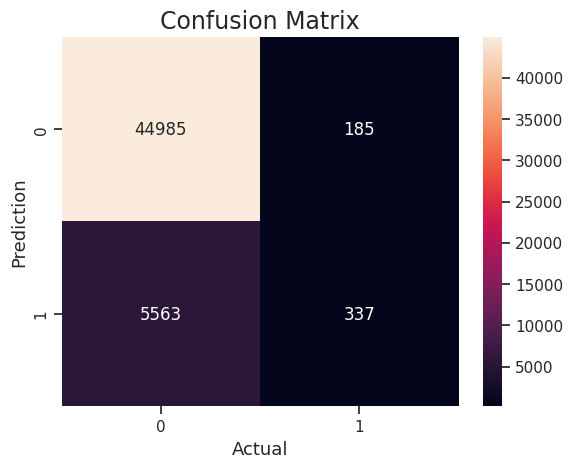

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions with the best model
y_pred = clf.predict(X_test)
y_pred

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#ConfusionMatrixDisplay(confusion_matrix=cm).plot()

sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()